In [ ]:
# default_exp core

# Voynich decoding attempts

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

# Idea: frequency count of all words, which are most common - this time using EVA transcription

# from Voynich information browser
http://voynich.freie-literatur.de/index.php?show=extractor


In [1]:
# frequency count using  code from https://gist.github.com/nmpowell/f3faf7496bf9d915579f 'Nick Powell (PhD student, CMIC & CABI, UCL, UK), nicholas.powell.11@ucl.ac.uk'
import os
import sys
import string
import argparse
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
#put file info here
rawfilepath = 'transcriptions/basiceva.txt'

#and number of results desired
top_n = 200

In [3]:
# Load the file
    filepath = os.path.normpath(os.path.join(rawfilepath))
    file = open(filepath, 'r')

In [4]:
 # Parse as a list, removing lines
    content_sublists = [line.split(',') for line in file.readlines()]

In [5]:
 # Parse into a single list (from a list of lists)
    content_list = [item for sublist in content_sublists for item in sublist]

In [6]:
 # Remove whitespace so we can concatenate appropriately, and unify case
    content_list_strip = [str.strip().lower() for str in content_list]

In [7]:
 # Concatenate strings into a single string
    content_concat = ' '.join(content_list_strip)

In [22]:
#  MP- TESTING this step to replace period with space?
 #  content_concat2 = [w.replace('.', ' ') for w in content_concat]
content_concat2 = content_concat.replace(".", " ") 


In [23]:
# Remove punctuation and new lines #don't remove punctuation, it's important in the eva transcription style
    punct = set(string.punctuation)
    unpunct_content = ''.join(x for x in content_concat2)
                              
                              #if x not in punct)

In [26]:
# Split string into list of strings, again
    word_list = unpunct_content.split()

In [27]:
 # Perform count
    counts_all = Counter(word_list)
    words, count_values = zip(*counts_all.items())

In [28]:
# Sort both lists by frequency in values (Schwartzian transform) - thanks, http://stackoverflow.com/questions/9543211/sorting-a-list-in-python-using-the-result-from-sorting-another-list
    values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))

In [29]:
 # Top N
    words_sorted_top = words_sorted[0:top_n]
    values_sorted_top = values_sorted[0:top_n]

In [30]:
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("{0} unique words identified in the text file, {1}".format(len(values_sorted), filepath))
print("The top {0} words are: \n{1}".format(top_n, words_sorted_top))
print("... their respective frequencies: \n{0}".format(values_sorted_top))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Pandas DataFrame just for visualisation
df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
print("{0}".format(df))
sys.stdout.flush()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
10677 unique words identified in the text file, transcriptions/basiceva.txt
The top 200 words are: 
('daiin', 'ol', 'chedy', 'aiin', 'shedy', 'chol', 'or', 'chey', 'ar', 'qokeey', 'qokeedy', 'shey', 'qokedy', 'qokaiin', 'dar', 'al', 'chor', 'qokai!n', 'dal', 'okaiin', 'qokal', 'shol', 'cheey', 'okeey', 'cheol', 's', 'qokar', 'otedy', 'otaiin', 'qol', 'sheey', 'otar', 'oteey', 'chdy', 'chy', 'otal', 'sho', 'dy', 'chckhy', 'okal', 'qoky', 'okar', 'dol', 'okedy', 'saiin', 'sheol', 'y', 'qokol', 'qokey', 'dai!n', 'daiin-', 'okeedy', 'lchedy', 'dair', 'oteedy', 'cheor', 'dy-', 'okai!n', 'shor', 'qotedy', 'oty', 'sheedy', 'shy', 'chody', 'cthy', 'otol', 'r', 'chcthy', 'cheody', 'qoteedy', 'otai!n', 'qokain', 'air', 'okol', 'qotaiin', 'char', 'dor', 'qoty', 'cheo', 'qokchy', 'dain', 'kaiin', 'oky', 'cho', 'qotchy', 'sar', 'o', 'okeol', 'qotar', 'cheedy', 'okey', 'shckhy', 'dam-', 'qokchdy', 'cheky', 'otey', 'raiin', 'qotal', 's

In [31]:
 # Histogram
    
# Make xticklabels comprehensible by matplotlib
xticklabels = str(list(words_sorted_top)).split()

# Remove the single quotes, commas and enclosing square brackets
xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]

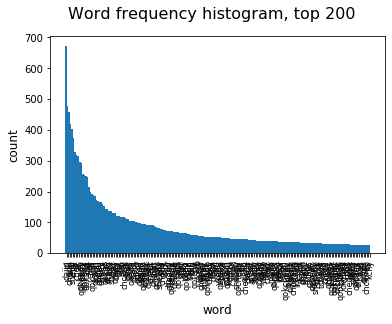

In [32]:
indices = np.arange(len(words_sorted_top))
width = 1
fig = plt.figure()
fig.suptitle('Word frequency histogram, top {0}'.format(top_n), fontsize=16)
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.bar(indices, values_sorted_top, width)
plt.xticks(indices + width * 0.5, xtlabs, rotation='vertical', fontsize=8)
plt.show()


In [33]:
pd.set_option('display.max_rows', None)

In [34]:
df


,count,word
0,672,daiin
1,476,ol
2,457,chedy
3,420,aiin
4,403,shedy
5,374,chol
6,327,or
7,317,chey
8,314,ar
9,296,qokeey


In [ ]:
from nbdev.export import *
notebook2script()

In [20]:
content_concat2

'fachys ykal ar ataiin shol shory cth!res y kor sholdy!- sory ckhar o!r y kair chtaiin shar are cthar cthar dan!- syaiir sheky or ykaiin shod cthoary cthes daraiin sa- ooiin oteey oteos roloty cth*ar daiin otaiin or okan- dair y chear cthaiin cphar cfhaiin= ydar!aish!!!y= * odar o !!!!y shol cphoy oydar sh! s cfhoaiin shodary- yshey shody okcho!y otchol chocthy os!chy dain chor kos- daiin shos cfhol shody= dain os teody= * ydain cphesaiin ol s cphey ytain shoshy cphodal!es- oksho kshoy otairin oteol okan shodain sckhey daiin- shoy ckhey kodaiin cphy cphodaiils cthey she oldain d!- dain oiin chol odaiin chodain chdy okain dan cthy kod!- daiin shckhey ckeor chor shey kol chol chol kor chal- sho chol sh!odan kshy kchy dor chodaiin sho kchom- ycho tchey chokain sheo pshol dydyd cthy daicthy- yto shol she kodshey cphealy das!ain dain ckhyds- dchar shcthaiin okaiir chey rchy !potol cthols dlocta- shok chor chey dain ckhey= otol daiiin= cpho shaiin shokcheey chol tshodeesy shey pydeey chy ro 

In [25]:
unpunct_content

'fachys ykal ar ataiin shol shory cth!res y kor sholdy!- sory ckhar o!r y kair chtaiin shar are cthar cthar dan!- syaiir sheky or ykaiin shod cthoary cthes daraiin sa- ooiin oteey oteos roloty cth*ar daiin otaiin or okan- dair y chear cthaiin cphar cfhaiin= ydar!aish!!!y= * odar o !!!!y shol cphoy oydar sh! s cfhoaiin shodary- yshey shody okcho!y otchol chocthy os!chy dain chor kos- daiin shos cfhol shody= dain os teody= * ydain cphesaiin ol s cphey ytain shoshy cphodal!es- oksho kshoy otairin oteol okan shodain sckhey daiin- shoy ckhey kodaiin cphy cphodaiils cthey she oldain d!- dain oiin chol odaiin chodain chdy okain dan cthy kod!- daiin shckhey ckeor chor shey kol chol chol kor chal- sho chol sh!odan kshy kchy dor chodaiin sho kchom- ycho tchey chokain sheo pshol dydyd cthy daicthy- yto shol she kodshey cphealy das!ain dain ckhyds- dchar shcthaiin okaiir chey rchy !potol cthols dlocta- shok chor chey dain ckhey= otol daiiin= cpho shaiin shokcheey chol tshodeesy shey pydeey chy ro 